In [1]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import os
import numpy as np
from datetime import datetime
import dateutil.relativedelta
import configparser

In [2]:
import requests
res = requests.get('https://telegram.org/')
print(res)

<Response [200]>


In [3]:
# %%capture
# %pip install -r requirements.txt
# !python -m nltk.downloader stopwords
# !python -m nltk.downloader wordnet
# !python -m nltk.downloader omw-1.4

In [4]:
if not os.path.exists('Last_Updated.txt'):
    last_updated_time = str(
        datetime.now() + dateutil.relativedelta.relativedelta(months=-1))
    CurrentYear,CurrentMonth,CurrentDate = [int(i) for i in last_updated_time.split(" ")[0].split("-")]
else:
    with open('Last_Updated.txt', 'r') as f:
        last_updated_time = f.read()
        CurrentYear,CurrentMonth,CurrentDate = [int(i) for i in last_updated_time.split(" ")[0].split("-")]

In [5]:
import ast
config = configparser.ConfigParser()
config.read_file(open('config.cfg'))
binance_coins= ast.literal_eval(config.get('Telegram', 'Coins'))
groups = ast.literal_eval(config.get('Telegram', 'Groups'))
print(groups)

['bestcryptotutor', 'binancefuturesignal', 'BitmexCourses', 'btctradingclub', 'coin_signals', 'CryptoClassicsVIP', 'CRYPTONOTESMOHSIN', 'cryptopapasignals', 'CryptoProfitCoach', 'cryptosignalalert', 'CryptoSignalCrazy', 'FedRussianInsiders', 'freebitmexsignals', 'godx_signals', 'QualitySignalsChannel', 'The_CryptoLogy_Signals', 'UltimateCryptoSignals']


In [6]:
import snscrape.modules.telegram as telegram
import pandas as pd

tweets_list = []
for i in groups:
    print(i)
    for x,tel in enumerate(telegram.TelegramChannelScraper(i).get_items()):
        y,m,d = [int(i) for i in str(tel.date).split(' ')[0].split('-')]
        if  (m<=CurrentMonth and d<=CurrentDate):
            break
        tweets_list.append([i,str(tel.date).split(' ')[0],str(tel.date).split(' ')[1].split('+')[0], tel.content])
    

bestcryptotutor
binancefuturesignal
BitmexCourses
btctradingclub
coin_signals
CryptoClassicsVIP
CRYPTONOTESMOHSIN
cryptopapasignals
CryptoProfitCoach
cryptosignalalert
CryptoSignalCrazy
FedRussianInsiders
freebitmexsignals
godx_signals
QualitySignalsChannel
The_CryptoLogy_Signals
UltimateCryptoSignals


In [7]:
tel_df = pd.DataFrame(tweets_list, columns=['Name','Date','Time','Text'])
tel_df

,Name,Date,Time,Text
0,bestcryptotutor,2023-04-12,19:24:38,Signal Type🚦Future/Spot Exchange♻️ Binance Coi...
1,bestcryptotutor,2023-04-12,16:14:08,Signal Type🚦Future/Spot Exchange♻️ Binance Coi...
2,bestcryptotutor,2023-04-12,16:06:30,Signal Type🚦Future/Spot Exchange♻️ Binance Coi...
3,bestcryptotutor,2023-04-12,14:57:17,Signal Type🚦Future/SpotExchange♻️ BinanceCoin ...
4,bestcryptotutor,2023-04-11,15:00:41,Signal Type🚦Future/SpotExchange♻️ BinanceCoin ...
...,...,...,...,...
5459,UltimateCryptoSignals,2023-03-14,14:49:43,ETC/USDT LONG ZONE: 20.47 - 20.30 LEVERAGE:...
5460,UltimateCryptoSignals,2023-03-14,14:33:44,ETC/USDT LONG ZONE: 20.47 - 20.30 LEVERAGE:...
5461,UltimateCryptoSignals,2023-03-14,13:33:18,ETC/USDT LONG ZONE: 20.47 - 20.30LEVERAGE: 20x...
5462,UltimateCryptoSignals,2023-03-14,06:54:40,"If the reactions are high, we will signal agai..."


In [8]:
def MoreCleaning(text):
    if(text!= None):
        str_en = text.encode("ascii", "replace").replace(b"?",b" ")
        str_de = str_en.decode()
        str_de = re.sub(' +', ' ', re.sub(r"([0-9]+(\.[0-9]+)?)",r" \1 ", str_de).strip())
        str_de = re.sub(r"\bStop\sLoss\b", "StopLoss", str_de,re.IGNORECASE)
        matches = re.findall(r"\btarget[s]?\b", str_de,re.IGNORECASE)
        if matches:
            return str_de
        else:
            return np.nan
tel_df["Text"] = tel_df["Text"].apply(MoreCleaning)


In [9]:
tel_df= tel_df.iloc[::-1]
tel_df

,Name,Date,Time,Text
5463,UltimateCryptoSignals,2023-03-14,06:34:12,NaN
5462,UltimateCryptoSignals,2023-03-14,06:54:40,NaN
5461,UltimateCryptoSignals,2023-03-14,13:33:18,NaN
5460,UltimateCryptoSignals,2023-03-14,14:33:44,NaN
5459,UltimateCryptoSignals,2023-03-14,14:49:43,NaN
...,...,...,...,...
4,bestcryptotutor,2023-04-11,15:00:41,Signal Type Future/SpotExchange BinanceCoin (G...
3,bestcryptotutor,2023-04-12,14:57:17,Signal Type Future/SpotExchange BinanceCoin (W...
2,bestcryptotutor,2023-04-12,16:06:30,Signal Type Future/Spot Exchange Binance Coin ...
1,bestcryptotutor,2023-04-12,16:14:08,Signal Type Future/Spot Exchange Binance Coin ...


In [10]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
exclude.remove('.')
exclude.remove('-')
lemma = WordNetLemmatizer()
def text_cleaning(text):
    stop_free = ' '.join([word for word in str(text).split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized

tel_df["Cleaned Text"]= tel_df["Text"].apply(text_cleaning)

C:\Users\Mohib\AppData\Local\Temp\ipykernel_12976\1745434497.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tel_df["Cleaned Text"]= tel_df["Text"].apply(text_cleaning)


In [11]:
tel_df.groupby('Name').count()

,Date,Time,Text,Cleaned Text
Name,,,,
BitmexCourses,57,57,43,57
CRYPTONOTESMOHSIN,124,124,8,124
CryptoClassicsVIP,279,279,151,279
CryptoProfitCoach,36,36,3,36
CryptoSignalCrazy,19,19,4,19
FedRussianInsiders,224,224,39,224
QualitySignalsChannel,2784,2784,2784,2784
The_CryptoLogy_Signals,198,198,91,198
UltimateCryptoSignals,233,233,46,233


In [12]:
os.chdir('C:\\Users\\Mohib\\Desktop\\Testing Channels')
if not os.path.exists('Channels'):
    os.mkdir('Channels')
os.chdir(os.path.join(os.getcwd(),'Channels'))
for i in groups:
    if not os.path.exists(i):
        os.mkdir(i)
    os.chdir(os.path.join(os.getcwd(),i))
    tel_df[tel_df['Name']==i].to_csv('0_'+i+'.csv', mode='w', index=False, header=False)
    os.chdir('C:\\Users\\Mohib\\Desktop\\Testing Channels\\Channels')
os.chdir("C:\\Users\\Mohib\\Desktop\\FinalYear\\Telegram")
with open('datetime.txt', 'w') as f:
    f.write(str(datetime.now()))

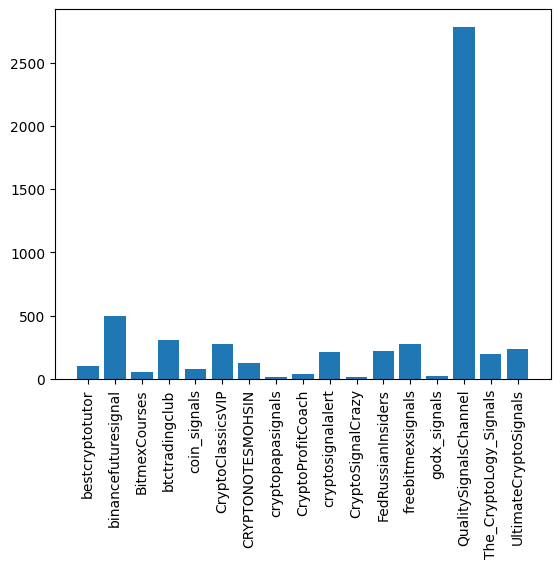

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
count = []
names = []
for group in groups:
    names.append(group)
    count.append(len(tel_df[tel_df['Name']==group]))
plt.bar(names,count)
plt.xticks(rotation=90)
plt.show()

Before Filter 1

In [20]:
def extractor(i):
    i = str(i)
    suffixes = 'usdt|busd|futures'
    coinsregex = '|'.join(binance_coins)
    found = False
    text = re.sub(r'[^\w\s]', ' ', i)
    for s in text.split():
        if re.search("({})({})+|({})+({})|^({})$|[0-9]+({})|({})[0-9]+".format(coinsregex,suffixes,suffixes,coinsregex,coinsregex,coinsregex,coinsregex), s,re.IGNORECASE):
            found = True
            break
    if(found):
        return i
    else: return np.nan
tel_df['Cleaned Text'] = tel_df['Cleaned Text'].apply(extractor)
tel_df_fil1 = tel_df[tel_df['Cleaned Text'].notna()] 
tel_df_fil1

C:\Users\Mohib\AppData\Local\Temp\ipykernel_12976\1935579755.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tel_df['Cleaned Text'] = tel_df['Cleaned Text'].apply(extractor)


,Name,Date,Time,Text,Cleaned Text
5457,UltimateCryptoSignals,2023-03-15,02:00:57,TRXUSDT - LONGLeverage : 20 xEntry : 0.06754 -...,TRXUSDT - LONGLeverage 20 xEntry 0.06754 - 0.0...
5429,UltimateCryptoSignals,2023-03-17,10:23:05,RSR 60 % Target 2 More signal @UltimateCS,RSR 60 Target 2 More signal UltimateCS
5394,UltimateCryptoSignals,2023-03-18,18:36:07,#ETCUSDT LONG LEVERAGE : 20 xENTRY : 21.01 - 2...,ETCUSDT LONG LEVERAGE 20 xENTRY 21.01 - 20.59 ...
5393,UltimateCryptoSignals,2023-03-19,06:46:22,#ETCUSDT LONG LEVERAGE : 20 x ENTRY : 21.01 - ...,ETCUSDT LONG LEVERAGE 20 x ENTRY 21.01 - 20.59...
5390,UltimateCryptoSignals,2023-03-19,12:07:10,#STXUSDT LONG LEVERAGE : 10 xENTRY : 1.088 - 1...,STXUSDT LONG LEVERAGE 10 xENTRY 1.088 - 1.049 ...
...,...,...,...,...,...
4,bestcryptotutor,2023-04-11,15:00:41,Signal Type Future/SpotExchange BinanceCoin (G...,Signal Type FutureSpotExchange BinanceCoin GAL...
3,bestcryptotutor,2023-04-12,14:57:17,Signal Type Future/SpotExchange BinanceCoin (W...,Signal Type FutureSpotExchange BinanceCoin WOO...
2,bestcryptotutor,2023-04-12,16:06:30,Signal Type Future/Spot Exchange Binance Coin ...,Signal Type FutureSpot Exchange Binance Coin W...
1,bestcryptotutor,2023-04-12,16:14:08,Signal Type Future/Spot Exchange Binance Coin ...,Signal Type FutureSpot Exchange Binance Coin F...


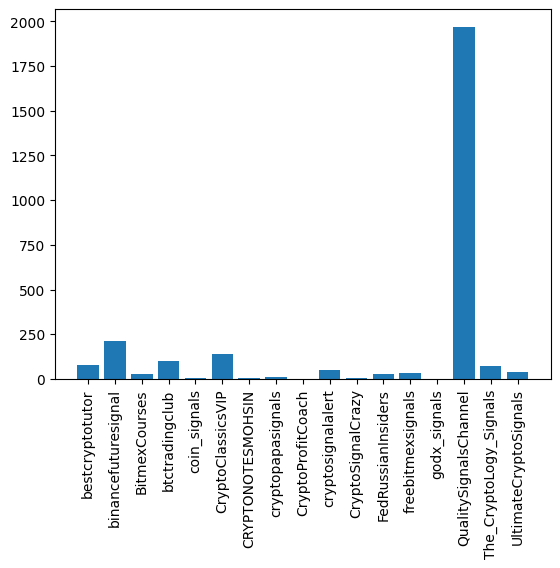

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
count = list()
names = list()
for group in groups:
    names.append(group)
    count.append(len(tel_df_fil1[tel_df_fil1['Name']==group]))
plt.bar(names,count)
plt.xticks(rotation=90)
plt.show()

After Filter 1 

Change Write Mode to Append

In [22]:
os.chdir('C:\\Users\\Mohib\\Desktop\\Testing Channels')
if not os.path.exists('Channels'):
    os.mkdir('Channels')
os.chdir(os.path.join(os.getcwd(),'Channels'))
for i in groups:
    if not os.path.exists(i):
        os.mkdir(i)
    os.chdir(os.path.join(os.getcwd(),i))
    tel_df_fil1[tel_df_fil1['Name']==i].to_csv('1_'+i+'.csv', mode='w', index=False, header=False)
    os.chdir('C:\\Users\\Mohib\\Desktop\\Testing Channels\\Channels')
os.chdir("C:\\Users\\Mohib\\Desktop\\FinalYear\\Telegram")
with open('datetime.txt', 'w') as f:
    f.write(str(datetime.now()))